<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3_MIO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EN ESTE EJERCICIO VOY A INTENTAR HACER TODO EN PYTHON.
# TRABAJO CON EL ARCHIVO U239_IMPORTADO QUE TENGO EN LA CARPETA DE MACHINE LEARNING. ESTA IMPORTADO DEL U239 ORIGINAL QUE TENGO EN MAESTRO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [4]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [5]:
df.head()

,Tall,Referencia,Fecha Fa,Fec.aper,Cta.car,Nombre cliente,Cta.tit,Nombre titular,Recamb.,RECAMBIOS PVP,Tiem.fac,Total.MO,Modelo,Recep,Matricula,Bastidor,Tipo O.R.,OR UNICA,MES,AÑO,ESTANCIA,ORDEN CORTA
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [6]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [7]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [8]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287597 entries, 0 to 287596
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            287597 non-null  int64         
 1   Referencia      287597 non-null  int64         
 2   Fecha_Fact      273899 non-null  datetime64[ns]
 3   Fecha_Apertura  287597 non-null  datetime64[ns]
 4   Cta_Cargo       283357 non-null  object        
 5   Nombre_Cliente  287596 non-null  object        
 6   Cta_Titular     287566 non-null  object        
 7   Nombre_Titular  287565 non-null  object        
 8   Recamb          287597 non-null  float64       
 9   Recamb_Pvp      287597 non-null  float64       
 10  Tiemp_Fact      287592 non-null  float64       
 11  Total_Mo        287592 non-null  float64       
 12  Modelo          286311 non-null  object        
 13  Recep           287597 non-null  object        
 14  Matricula       287597 non-null  obj

In [10]:
# voy a filtrar por fecha
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-06-30")] # CAMBIO LA FECHA Y METO ESTE AÑO. 

In [11]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [12]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Nombre_Cliente"] = df["Nombre_Cliente"].apply(str)
df["Cta_Titular"] = df["Cta_Titular"].apply(str)
df["Nombre_Titular"] = df["Nombre_Titular"].apply(str)
df["Modelo"] = df["Modelo"].apply(str)
df["Recep"] = df["Recep"].apply(str)
df["Matricula"] = df["Matricula"].apply(str)
df["Bastidor"] = df["Bastidor"].apply(str)
df["Tipo_Or"] = df["Tipo_Or"].apply(str)


In [13]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [14]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [15]:
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("5")!=True]
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("6")!=True]

In [16]:
df.Tipo_Or.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. 

2A O.R.CLIENT MEC AUDI       0.244051
2V O.R.CLIENT MEC VW         0.172226
7A PRESUPUESTO CH AUDI       0.135980
4A GARANTIA MECAN AUDI       0.116073
7V PRESUPUESTO CH VW         0.090288
4V GARANTIA MECAN VW         0.074610
11LV O.R. MEC VW LONG DRI    0.038441
2A O.R.CLIENT MEC AUDI-CO    0.035830
11LA O.R. MEC AU LONG DRI    0.031743
2V O.R.CLIENT MEC VW-CONT    0.022938
7LA PRES  AU CH  LONG DRI    0.005650
1A O.R.CLIENT CH AUDI        0.004472
2L O.R.CLIENT MEC LCV        0.003182
2RA O.R.CLIENT MEC AUDI -    0.003079
DG DEFER.GARANTIA AUDI       0.002959
7LV PRES  VW CH  LONG DRI    0.002861
12LA O.R. MEC AU VW RENTI    0.002602
2RV O.R.CLIENT MEC VW-CRE    0.002151
4L GARANTIA MECAN LCV        0.002030
GD DEFER.GARANTIA MECAN V    0.002026
1V O.R.CLIENT CH VW          0.001602
12LV O.R. MEC VW VW RENTI    0.001348
2L O.R.CLIENT MEC LCV-CON    0.001067
7L PRESUPUESTO CH LCV        0.000995
11LL O.R. MEC LCV LONG DR    0.000964
2RL O.R.CLIENT MEC LCV-CR    0.000223
12LL O.R. ME

In [17]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.60,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05,774180
35,3,7747151,2015-01-02,2015-01-02,99476,SANCHEZ FAUQUIER MARIA,99476,SANCHEZ FAUQUIER MARIA,214.89,429.78,2.40,189.51,AUDI A3 SB,63,0511GMX,WAUZZZ8P79A151117,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774715,404.40,774715
37,3,7747441,2015-01-02,2015-01-02,73994,MORENO CANELO REGINA,73994,MORENO CANELO REGINA,231.09,462.18,2.40,189.46,A-3 2.0TDI,63,1076DRZ,WAUZZZ8P36B002015,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774744,420.55,774744


In [18]:
df.shape

(224084, 24)

In [19]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Tall                 0
Referencia           0
Fecha_Fact        9141
Fecha_Apertura       0
Cta_Cargo            0
Nombre_Cliente       0
Cta_Titular          0
Nombre_Titular       0
Recamb               0
Recamb_Pvp           0
Tiemp_Fact           5
Total_Mo             5
Modelo               0
Recep                0
Matricula            0
Bastidor             0
Tipo_Or              0
Or_Unica             0
MES                  0
AÑO                  0
ESTANCIA             0
Orden_Corta          0
Fact_total           5
Orden_Corta2         0
dtype: int64

In [20]:
df.Orden_Corta2.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

153462

In [21]:
df.Bastidor.nunique() # tenemos 58.809 vehículos bastidores diferentes. 

49484

In [22]:
df.Fact_total.describe() # aquí tenemos los estadísticos de facturación total. vemos valores negativos que serán los abonos. 

count    224079.000000
mean        395.951497
std         921.056444
min      -32419.720000
25%          67.670000
50%         242.970000
75%         482.585000
max       32419.720000
Name: Fact_total, dtype: float64

In [23]:
df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape

(220166, 24)

In [24]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2022-06-29 00:00:00


In [25]:
df.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    220166.000000
mean        428.668024
std         817.479007
min           0.000000
25%          79.790000
50%         248.280000
75%         486.507500
90%         893.880000
95%        1351.255000
99%        3308.061500
max       32419.720000
Name: Fact_total, dtype: float64

In [26]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

49478

In [27]:
df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes. 

34

In [28]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 58.714 bastidores. 

49478

In [29]:
df.shape # tenemos 274.898 filas

(220166, 24)

In [30]:
df.isnull().sum()

Tall                 0
Referencia           0
Fecha_Fact        9141
Fecha_Apertura       0
Cta_Cargo            0
Nombre_Cliente       0
Cta_Titular          0
Nombre_Titular       0
Recamb               0
Recamb_Pvp           0
Tiemp_Fact           5
Total_Mo             0
Modelo               0
Recep                0
Matricula            0
Bastidor             0
Tipo_Or              0
Or_Unica             0
MES                  0
AÑO                  0
ESTANCIA             0
Orden_Corta          0
Fact_total           0
Orden_Corta2         0
dtype: int64

In [31]:
# vamos a quitar todas las filas que no tengan numero de bastidor.
df = df[~df.Bastidor.isnull()]
df.shape

(220166, 24)

In [32]:
# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]

In [33]:
df.Bastidor.nunique() #58058 bastidores. 

49088

In [34]:
df.info() # aqui he quitado todos los nulos. podría haberlos sustituido por otra cosa.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211025 entries, 7 to 287596
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            211025 non-null  object        
 1   Referencia      211025 non-null  object        
 2   Fecha_Fact      211025 non-null  datetime64[ns]
 3   Fecha_Apertura  211025 non-null  datetime64[ns]
 4   Cta_Cargo       211025 non-null  object        
 5   Nombre_Cliente  211025 non-null  object        
 6   Cta_Titular     211025 non-null  object        
 7   Nombre_Titular  211025 non-null  object        
 8   Recamb          211025 non-null  float64       
 9   Recamb_Pvp      211025 non-null  float64       
 10  Tiemp_Fact      211020 non-null  float64       
 11  Total_Mo        211025 non-null  float64       
 12  Modelo          211025 non-null  object        
 13  Recep           211025 non-null  object        
 14  Matricula       211025 non-null  obj

In [35]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        5
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
dtype: int64

In [36]:
# creating some columns for exploratory


df['year'] = df['Fecha_Apertura'].dt.year # sacamos el año de la fecha
df['month'] = df['Fecha_Apertura'].dt.month # sacamos el mes
df['day'] = df['Fecha_Apertura'].dt.day # sacamos el día. 
df['day_of_week'] = df['Fecha_Apertura'].dt.dayofweek # sacamos el día de la semana. 

In [37]:
df.head(2)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137,2015,1,2,4


# AQUI YA METO SOLO VOLKSWAGEN

In [43]:
df_volk = df.copy()

In [44]:
"""df_audi = df_audi[df_audi["Tall"]== "1", "3", "6"]
reqd_stocks = stocks_df[(stocks_df.Sector == "Technology") & (stocks_df.Price <500)]
df_audi = df_audi[(df_audi.Tall== "1")  (df_audi.Tall== "6") or (df_audi.Tall== "3")]
df_audi = df_audi["Tall"].isin(["1", "3", "6"])"""
df_volk = df_volk.loc[(df['Tall'] == '2') | (df_volk['Tall'] == '8') | (df_volk['Tall'] == '10') ]

In [45]:
df_volk.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.0,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.6,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05,774180,2015,1,2,4
47,2,7756811,2015-01-02,2015-01-02,127908,FERNANDEZ ALONSO BLANCA,127908,FERNANDEZ ALONSO BLANCA,83.53,187.17,0.3,19.78,GOLF,85,7854GSF,WVWZZZ1KZAW088736,2V O.R.CLIENT MEC VW,nan,1,2015,0,775681,103.31,775681,2015,1,2,4
57,2,7723141,2015-01-05,2015-01-02,35398,SAEZ JIMENEZ JAVIER,35398,SAEZ JIMENEZ JAVIER,0.00,0.00,0.0,0.00,"GOLF ""NUEV",255,1104CHZ,WVWZZZ1JZ3W458960,2V O.R.CLIENT MEC VW,nan,1,2015,3,772314,0.00,772314,2015,1,2,4
61,2,7729291,2015-01-05,2015-01-05,122901,BLANCO OLIVARES JAVIER,122901,BLANCO OLIVARES JAVIER,147.43,336.12,1.6,98.80,POLO,50,4305HFC,WVWZZZ6RZCY006813,2V O.R.CLIENT MEC VW,nan,1,2015,0,772929,246.23,772929,2015,1,5,0


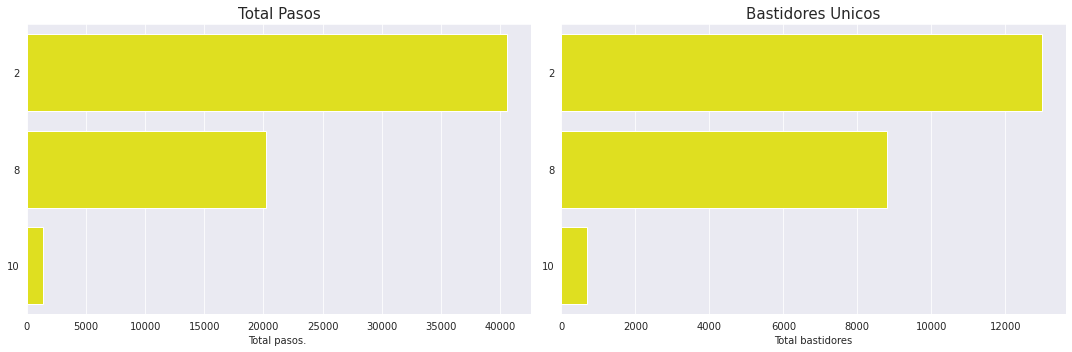

In [46]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Total pasos. ")
        plt.title("Total Pasos", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [47]:
df_volk.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
2     12984
8      8806
10      690
Name: Bastidor, dtype: int64

In [48]:
df_volk.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
2     40593
8     20195
10     1328
Name: Orden_Corta2, dtype: int64

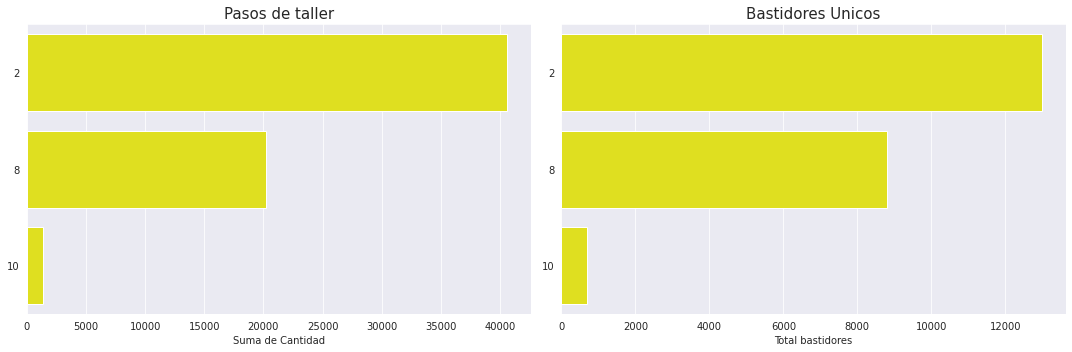

In [49]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [50]:
df_volk.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
2     12984
8      8806
10      690
Name: Bastidor, dtype: int64

In [51]:
df_volk.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. 

Tall
2     21457454.90
8     10852056.81
10      784802.57
Name: Fact_total, dtype: float64

In [52]:
df_volk.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # debería quitar todos los datos anteriores al 2015 y quizas el 2022

year
2019    6703
2018    6606
2017    6548
2021    6484
2020    5895
2016    5398
2015    4777
2022    3537
Name: Bastidor, dtype: int64

In [54]:
# si quiero agrupar por mas de una variable se hace así. 
df_volk.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
2     2017    4377
      2015    4217
      2018    4145
      2019    3973
      2016    3848
      2021    3785
      2020    3423
8     2019    2576
      2018    2496
      2021    2462
      2017    2265
      2020    2259
2     2022    2124
8     2016    1647
      2022    1241
      2015     723
10    2021     294
      2020     270
      2019     246
      2022     180
      2018      53
Name: Bastidor, dtype: int64

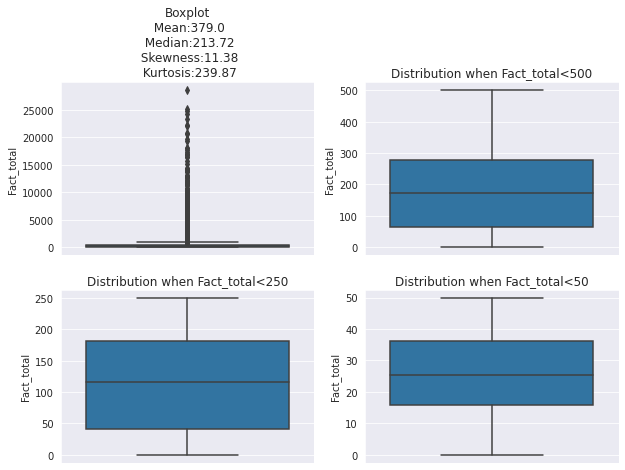

In [55]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df_volk.Fact_total.skew(),2) # calculamos el skewness
kurtosis = round(df_volk.Fact_total.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df_volk.Fact_total),0) # calculamos la media
median = np.median(df_volk.Fact_total) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df_volk.Fact_total)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df_volk[df_volk.Fact_total<500]['Fact_total'])
plt.title('Distribution when Fact_total<500')

plt.subplot(2,2,3)
sns.boxplot(y=df_volk[df_volk.Fact_total<250]['Fact_total'])
plt.title('Distribution when Fact_total<250')

plt.subplot(2,2,4)
sns.boxplot(y=df_volk[df_volk.Fact_total<50]['Fact_total'])
plt.title('Distribution when Fact_total<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos la facturación total. 

In [56]:
df_volk.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    87381.000000
mean       378.735815
std        703.900345
min          0.000000
25%         96.800000
50%        213.720000
75%        415.750000
90%        793.270000
95%       1214.540000
99%       2814.272000
max      28549.040000
Name: Fact_total, dtype: float64

In [57]:
# vamos a quitar todos los totales superiores a 5.000
df = df[df["Fact_total"]<2814]


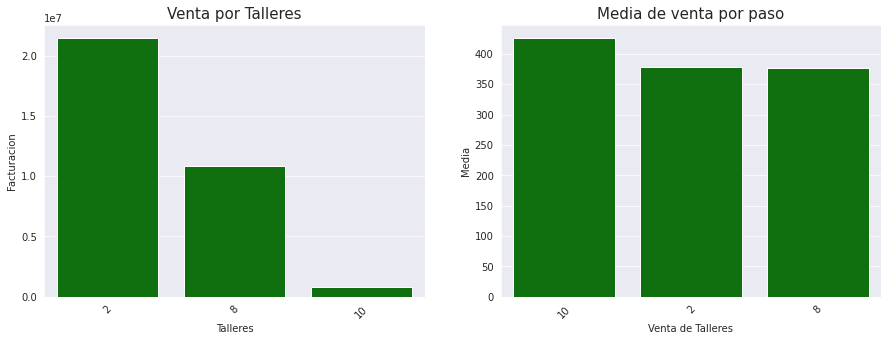

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df_volk.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).values, # agrupamos por taller y facturación total
            x = df_volk.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).index, 
            color='green')

plt.ylabel('Facturacion')
plt.xlabel('Talleres')
plt.xticks(rotation=45)
plt.title('Venta por Talleres',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df_volk.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).values, # agrupamos por taller y media de facturación por paso
            x = df_volk.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Media')
plt.xlabel('Venta de Talleres')
plt.xticks(rotation=45)
plt.title('Media de venta por paso',size=15)

plt.show()

In [59]:
df_volk.Fact_total.mean() # esta es la media de todos los valores. 

378.7358153374303

In [60]:
print(df_volk[df_volk["Tall"]=="2"]["Fact_total"].mean())
print(df_volk[df_volk["Tall"]=="8"]["Fact_total"].mean())
print(df_volk[df_volk["Tall"]=="10"]["Fact_total"].mean())
"""print(df[df["Tall"]=="2"]["Fact_total"].mean())
print(df[df["Tall"]=="10"]["Fact_total"].mean())
print(df[df["Tall"]=="8"]["Fact_total"].mean())"""

377.9450963469194
377.2528961273726
426.2914557305812


'print(df[df["Tall"]=="2"]["Fact_total"].mean())\nprint(df[df["Tall"]=="10"]["Fact_total"].mean())\nprint(df[df["Tall"]=="8"]["Fact_total"].mean())'

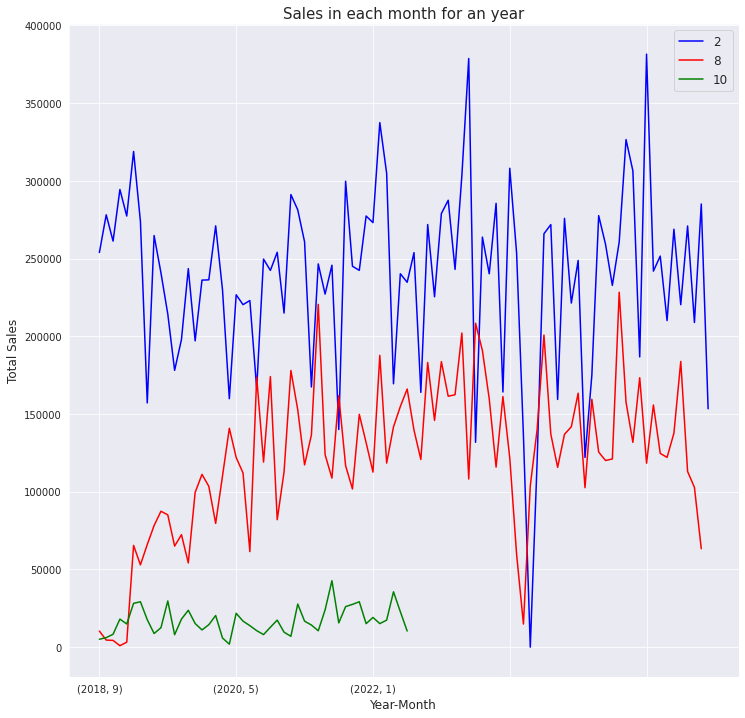

In [63]:
plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df[df['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

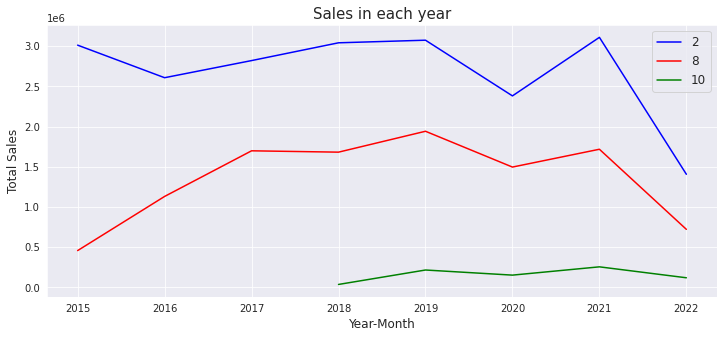

In [64]:
plt.figure(figsize=(12,5))
df_volk[df_volk['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. """

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

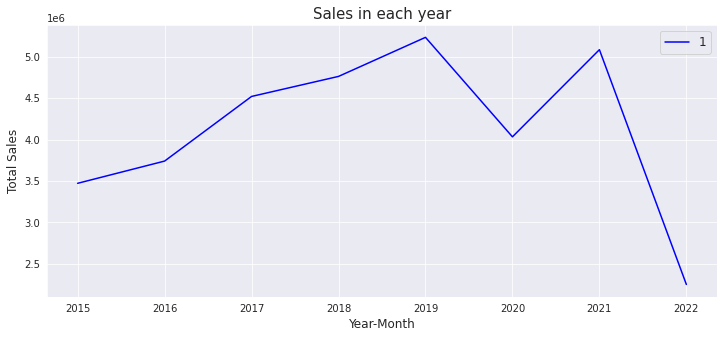

In [65]:
plt.figure(figsize=(12,5))
df_volk.groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

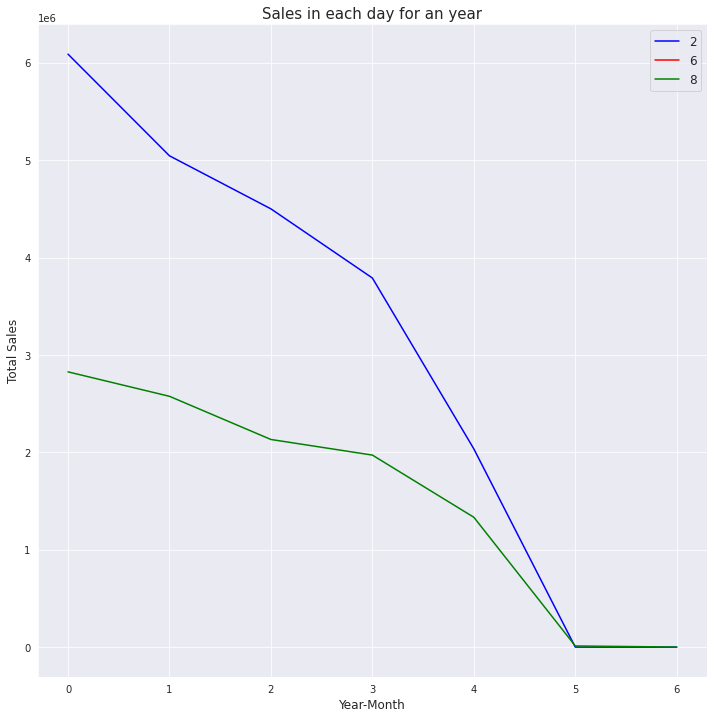

In [66]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='red')
df_volk[df_volk['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres.""" 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()

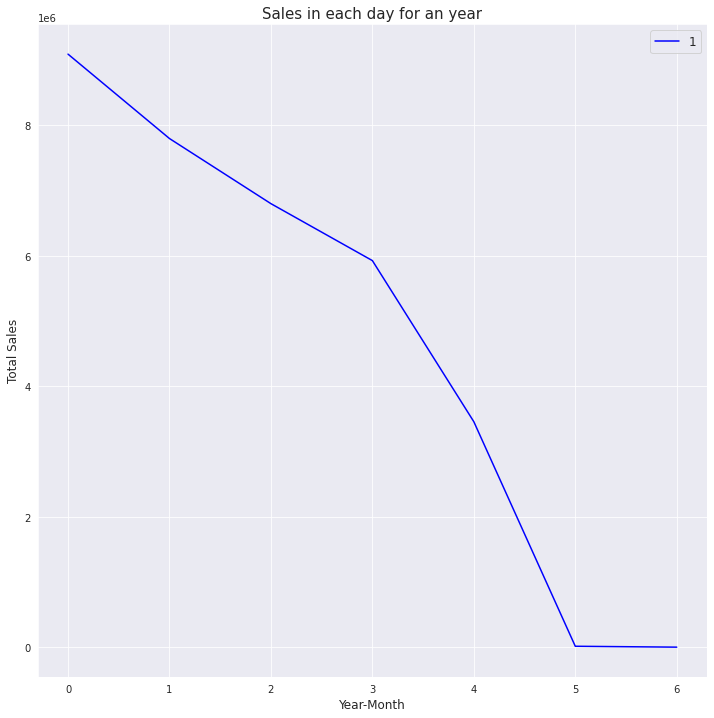

In [67]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df_volk.groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()

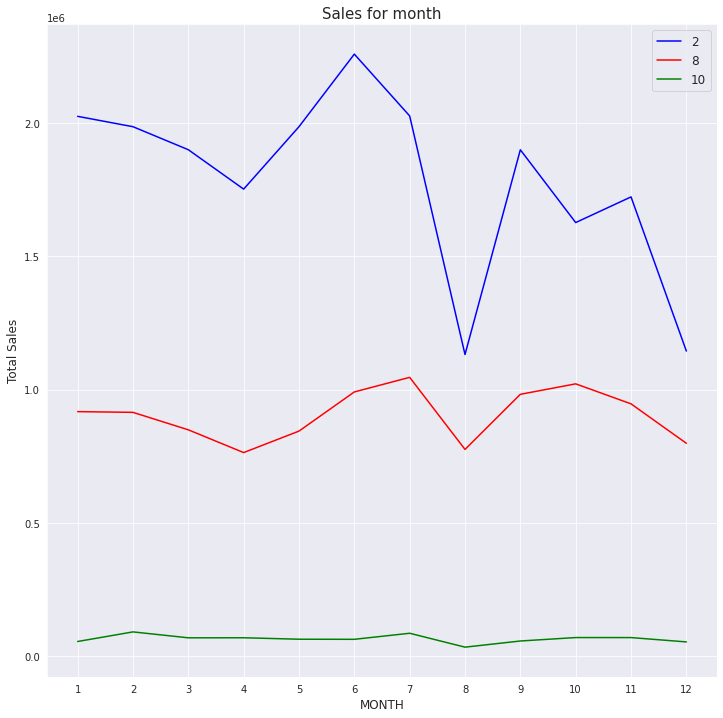

In [68]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)
plt.show()

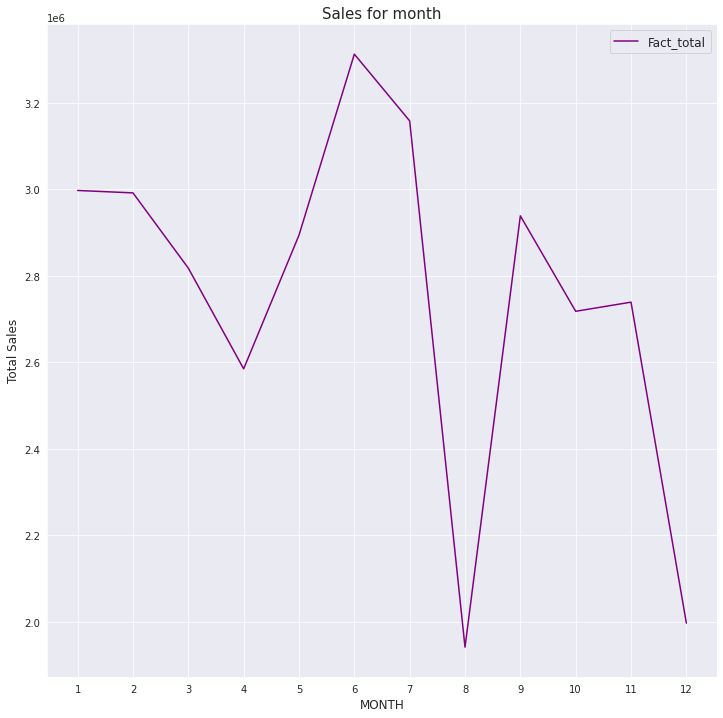

In [69]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk.groupby(['month'])['Fact_total'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

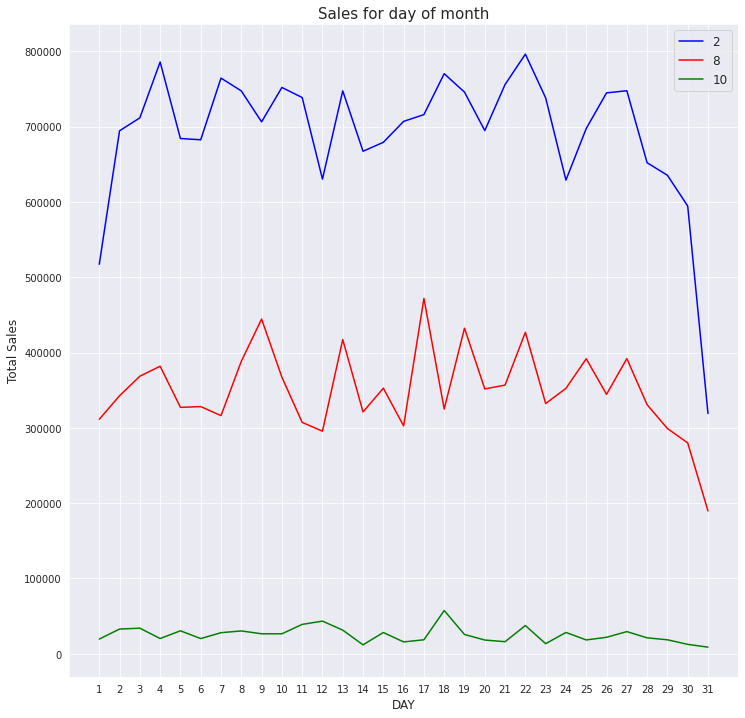

In [70]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. """ 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

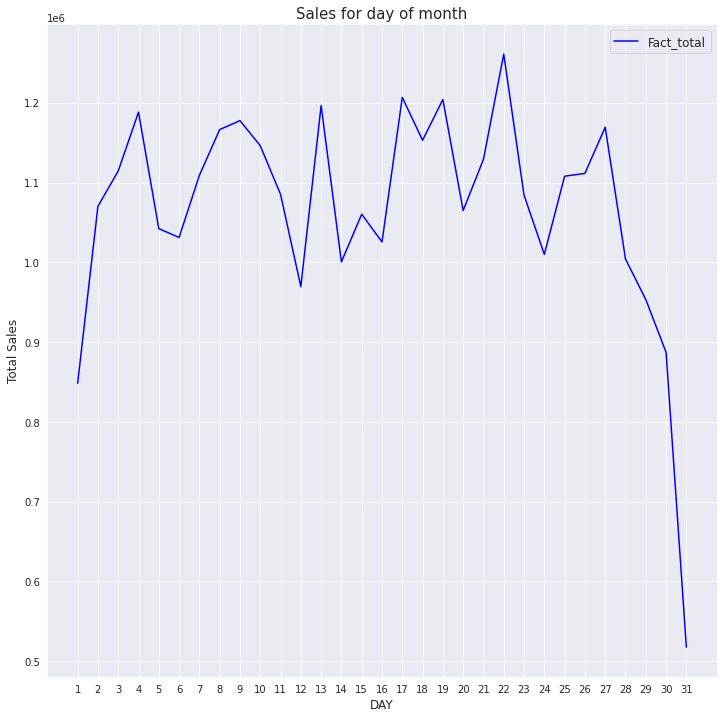

In [71]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk.groupby(['day'])['Fact_total'].sum().plot(kind='line',color='blue')

# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

In [72]:
df_cohort_volk = df_volk.copy()

- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra. 

In [ ]:
"""# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['Fecha_Apertura'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])"""

In [73]:
# voy a intentar cambiar de mes a año. 
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort_volk['InvoiceYear'] = df_cohort_volk['Fecha_Apertura'].dt.strftime("%Y") # Estamos convirtiendo tanto el mes como el día a 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort_volk['InvoiceYear'] = pd.to_datetime(df_cohort_volk['InvoiceYear'])

In [74]:
df_cohort_volk.InvoiceYear

7        2015-01-01
24       2015-01-01
47       2015-01-01
57       2015-01-01
61       2015-01-01
            ...    
287501   2022-01-01
287504   2022-01-01
287510   2022-01-01
287517   2022-01-01
287519   2022-01-01
Name: InvoiceYear, Length: 87381, dtype: datetime64[ns]

In [75]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort_volk['CohortYear'] = df_cohort_volk.groupby('Bastidor')['InvoiceYear'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort_volk['CohortYear'] = pd.to_datetime(df_cohort_volk['CohortYear'])

In [76]:
df_cohort_volk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87381 entries, 7 to 287519
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tall            87381 non-null  object        
 1   Referencia      87381 non-null  object        
 2   Fecha_Fact      87381 non-null  datetime64[ns]
 3   Fecha_Apertura  87381 non-null  datetime64[ns]
 4   Cta_Cargo       87381 non-null  object        
 5   Nombre_Cliente  87381 non-null  object        
 6   Cta_Titular     87381 non-null  object        
 7   Nombre_Titular  87381 non-null  object        
 8   Recamb          87381 non-null  float64       
 9   Recamb_Pvp      87381 non-null  float64       
 10  Tiemp_Fact      87378 non-null  float64       
 11  Total_Mo        87381 non-null  float64       
 12  Modelo          87381 non-null  object        
 13  Recep           87381 non-null  object        
 14  Matricula       87381 non-null  object        
 15  B

In [ ]:
"""# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])"""

In [77]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_Year(d1, d2):
    return((d1.dt.year - d2.dt.year))
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort_volk['CohortPeriod'] = diff_Year(df_cohort_volk['InvoiceYear'], df_cohort_volk['CohortYear'])

In [78]:
df_cohort_volk.sample(5)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week,InvoiceYear,CohortYear,CohortPeriod
151815,2,10946071,2019-01-21,2018-10-29,2291,VOLKSWAGEN RENTING S.A,69640,DIAZ DE SANTOS ESMERALD,12.78,26.98,1.20,84.24,GOLF SPORT,295,2690JJM,WVWZZZAUZGW083510,11LV O.R. MEC VW LONG DRI,nan,1,2019,84,1094607,97.02,1094607,2018,10,29,0,2018-01-01,2015-01-01,3
121817,2,10447122,2018-04-20,2018-04-19,116W,ORDENES DE REPARACION G,138069,LOPEZ RODRIGO MAXIMO,0.00,0.00,0.40,25.33,GOLF BUSIN,99,4556JNL,WVWZZZAUZGW295556,4V GARANTIA MECAN VW,nan,4,2018,1,1044712,25.33,1044712,2018,4,19,3,2018-01-01,2018-01-01,0
88235,8,9668422,2017-07-14,2017-06-13,98253,MUTUA MADRILEÑA AUTOMO,126336,GUZMAN RAMIREZ JOSE CAR,0.00,0.00,5.15,229.35,PASSAT BUS,9,0860HSJ,WVWZZZ3CZEP004527,7V PRESUPUESTO CH VW,nan,7,2017,31,966842,229.35,966842,2017,6,13,1,2017-01-01,2015-01-01,2
47944,2,8836271,2016-07-08,2016-07-07,22711,BERMUDEZ IGLESIAS ANDRE,22711,BERMUDEZ IGLESIAS ANDRE,126.14,296.14,1.20,59.81,TOURAN SPO,85,8059GXC,WVGZZZ1TZAW118298,2V O.R.CLIENT MEC VW,nan,7,2016,1,883627,185.95,883627,2016,7,7,3,2016-01-01,2015-01-01,1
132416,2,10617682,2018-07-30,2018-07-25,116W,ORDENES DE REPARACION G,140052,ALVAREZ DE SAMANIEGO JO,0.00,0.00,0.40,25.33,PASSAT ADV,50,1631JSV,WVWZZZ3CZHE052295,4V GARANTIA MECAN VW,nan,7,2018,5,1061768,25.33,1061768,2018,7,25,2,2018-01-01,2018-01-01,0


In [79]:
customer_cohort_volk = df_cohort_volk.pivot_table(index='CohortYear', columns='CohortPeriod', values='Bastidor', aggfunc='nunique')
customer_cohort_volk
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7
CohortYear,,,,,,,,
2015-01-01,4777.0,2302.0,2284.0,1614.0,1370.0,944.0,901.0,455.0
2016-01-01,3096.0,1397.0,1286.0,835.0,670.0,511.0,282.0,NaN
2017-01-01,2867.0,1057.0,927.0,646.0,531.0,218.0,NaN,NaN
2018-01-01,2649.0,1098.0,881.0,649.0,300.0,NaN,NaN,NaN
2019-01-01,2473.0,1005.0,972.0,422.0,NaN,NaN,NaN,NaN
2020-01-01,1749.0,727.0,365.0,NaN,NaN,NaN,NaN,NaN
2021-01-01,2193.0,510.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por año
        - por ejemplo 8859 del 2016 son los nuevos clientes diferentes de la primera fecha que es el 2015. al siguiente año fueron 7419 nuevos diferentes a abril del 2015 y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo de los 13975 clientes dem 2015 el siguiente año repiten 6630 en el año 2 repiten 6624 y asi sucesivamente.  

In [80]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort_volk.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort_volk.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7
2015-01-01,100.0,48.2,47.8,33.8,28.7,19.8,18.9,9.5
2016-01-01,100.0,45.1,41.5,27.0,21.6,16.5,9.1,NaN
2017-01-01,100.0,36.9,32.3,22.5,18.5,7.6,NaN,NaN
2018-01-01,100.0,41.4,33.3,24.5,11.3,NaN,NaN,NaN
2019-01-01,100.0,40.6,39.3,17.1,NaN,NaN,NaN,NaN
2020-01-01,100.0,41.6,20.9,NaN,NaN,NaN,NaN,NaN
2021-01-01,100.0,23.3,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


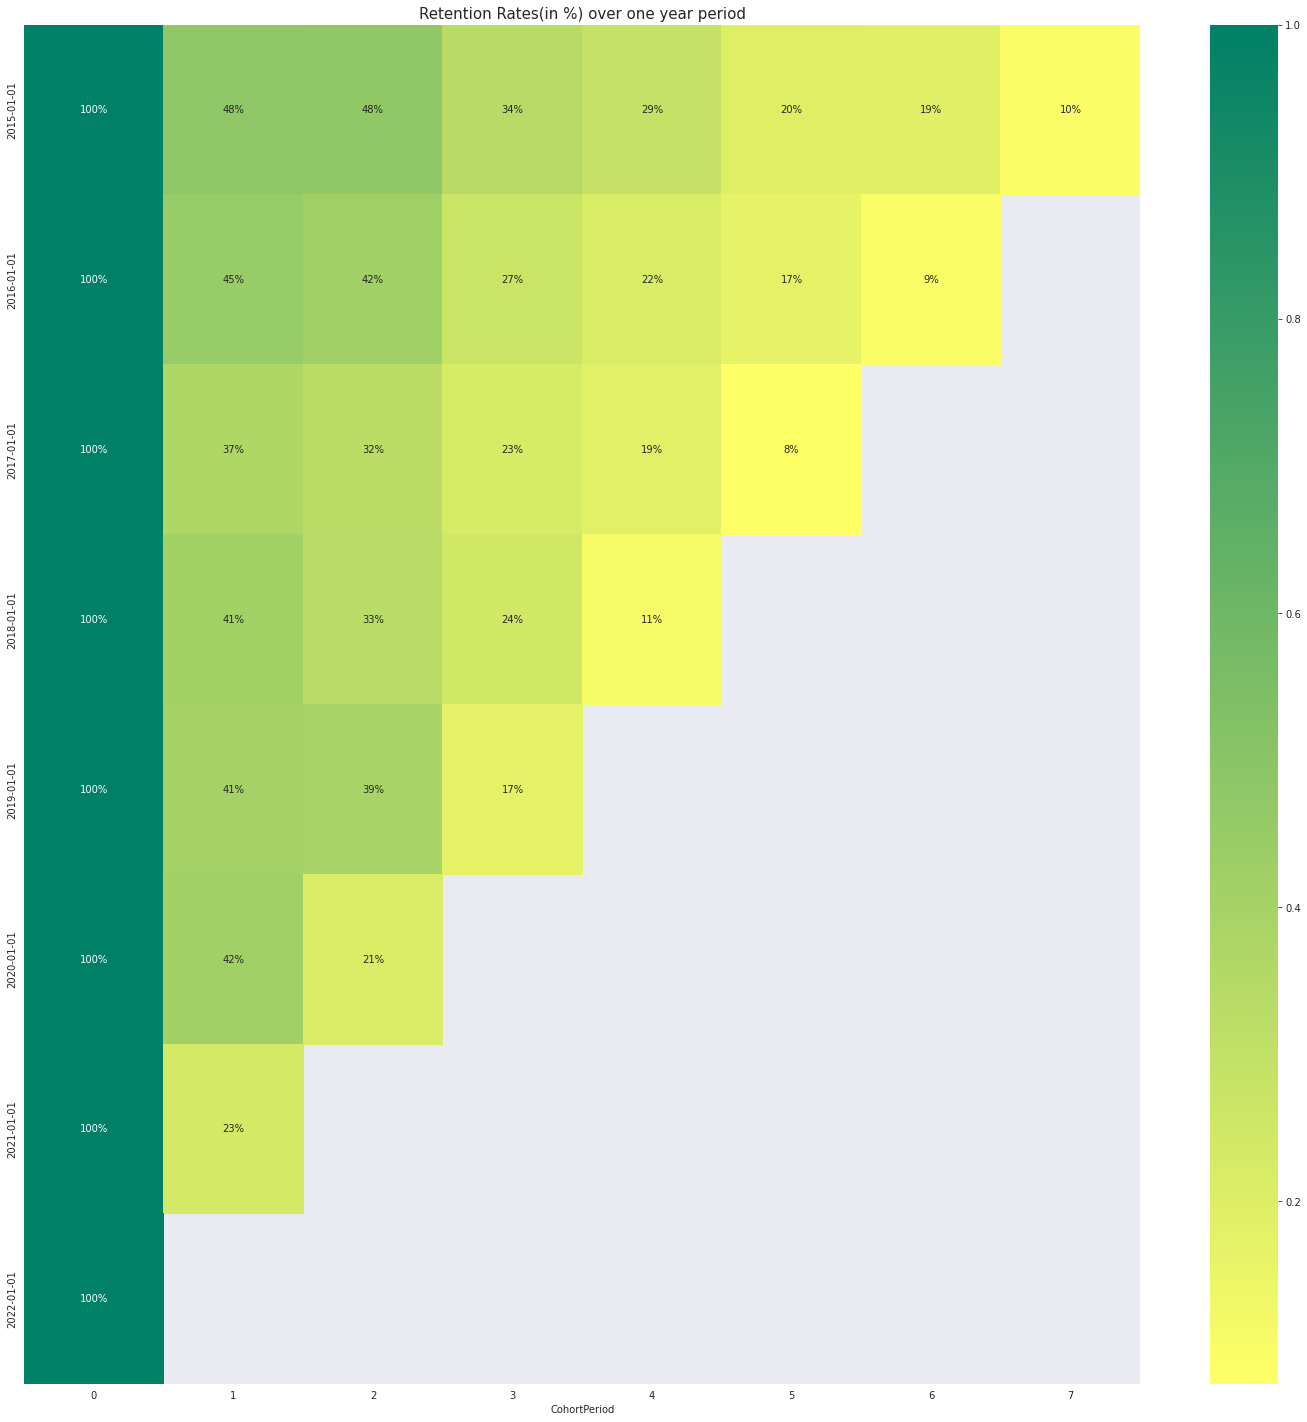

In [81]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(25, 25))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 
# tengo que hacerlo por años salen muchos meses, aparte de quitar los años anteriores al 2015

In [ ]:
amount_cohort_audi = df_cohort_audi.pivot_table(index='CohortYear', columns='CohortPeriod', values='Fact_total', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort_audi
# aqui estamos sacando la facturación media por paso de clientes en cada fecha. 

CohortPeriod,0,1,2,3,4,5,6,7
CohortYear,,,,,,,,
2015-01-01,460.32,482.74,445.95,526.99,583.93,539.97,626.11,611.98
2016-01-01,388.35,403.58,416.65,535.52,472.93,561.05,480.10,NaN
2017-01-01,339.22,432.68,426.82,462.98,487.30,491.08,NaN,NaN
2018-01-01,369.18,444.81,502.79,475.14,502.63,NaN,NaN,NaN
2019-01-01,372.17,494.86,508.23,546.57,NaN,NaN,NaN,NaN
2020-01-01,365.45,486.32,488.56,NaN,NaN,NaN,NaN,NaN
2021-01-01,414.61,503.39,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,392.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM ANALISIS

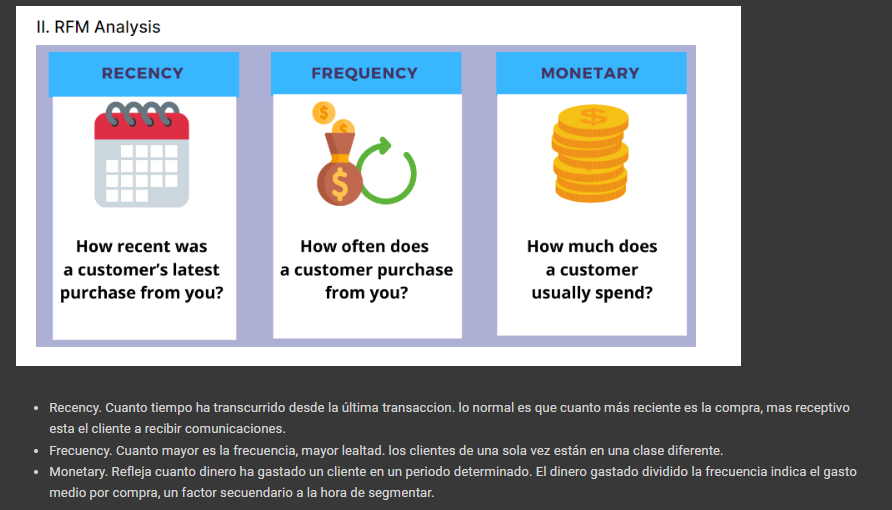

In [ ]:
df_rfm = df.copy() # hacemos la copia del original. 

In [ ]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm.groupby('Bastidor')['Fecha_Apertura'].max().reset_index())
# creamos la variable recency
recency['Fecha_Apertura'] = pd.to_datetime(recency['Fecha_Apertura']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['Fecha_Apertura'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['Fecha_Apertura']).dt.days + 1 # diferencia entre la fecha maxima de todas las facturas y la fecha maxima del bastidor en cuestión. 
recency = recency[['Bastidor','recency']] # elegimos las variables a mostrar. 
recency.head()

,Bastidor,recency
0,WAUZZZ4L97D07664,448
1,WAUZZZ8P07A02124,204
2,WAUZZZ8P1CA04845,2094
3,WAUZZZ8T4EA06800,655
4,WAUZZZ8TX8A00452,1507


In [ ]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('Bastidor')['Orden_Corta2'].nunique().reset_index())
frequency.columns = ['fBastidor','frequency']
frequency.head()

,fBastidor,frequency
0,WAUZZZ4L97D07664,5
1,WAUZZZ8P07A02124,2
2,WAUZZZ8P1CA04845,1
3,WAUZZZ8T4EA06800,6
4,WAUZZZ8TX8A00452,1


In [ ]:
frequency.isnull().sum()

fBastidor    0
frequency    0
dtype: int64

In [ ]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('Bastidor')['Fact_total'].sum().reset_index())
monetary.columns = ['mBastidor','monetary']
monetary.head()

,mBastidor,monetary
0,WAUZZZ4L97D07664,1233.45
1,WAUZZZ8P07A02124,757.33
2,WAUZZZ8P1CA04845,208.16
3,WAUZZZ8T4EA06800,4483.83
4,WAUZZZ8TX8A00452,156.80


In [ ]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1) # este es el nombre de cada dataframe
rfm.drop(['fBastidor',"mBastidor"], axis=1, inplace=True)
rfm.head(10)

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,448,5,1233.45
1,WAUZZZ8P07A02124,204,2,757.33
2,WAUZZZ8P1CA04845,2094,1,208.16
3,WAUZZZ8T4EA06800,655,6,4483.83
4,WAUZZZ8TX8A00452,1507,1,156.80
5,WAUZZZ8X1EB11477,2009,1,261.59
6,WAUZZZ8X3HB04230,836,1,388.49
7,WVWZZZ3CZ6E13699,1821,1,826.76
8,000000000FC001550,2319,1,36.66
9,0JHCL75406C200346,431,2,327.40


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad d

In [ ]:
#LO QUE VAMOS A SACAR EL EL PROMEDI ENTRE VISITA Y VISITA. 
# extracting SPEED OF VISIT

Bastidor_list = list(df_rfm.Bastidor.unique()) # creamos una lista con unicos de BAstidor
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in Bastidor_list:  # vamos a recorrer la lista de arriba. es decir la columna de Bastidores
    sov = df_rfm[df_rfm['Bastidor']==ids].groupby('Fecha_Apertura')['Orden_Corta2'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm.Bastidor que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por Fecha_Apertura e Orden_Corta2 y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['Fecha_Apertura1'] = sov['Fecha_Apertura'].shift(1) # generamos Fecha_Apertura1 que es el dato desplazado una posición
        sov['Difference'] = (sov['Fecha_Apertura']-sov['Fecha_Apertura1']).dt.days # generamos otra difference que es la diferencia entre Fecha_Apertura y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sBastidor'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sBastidor').reset_index(drop=True) # ordenamos
speed_of_visit.head()

In [ ]:
speed_of_visit.to_csv("/content/drive/MyDrive/Colab Notebooks/speed_of_visit.csv")

In [ ]:
df_rfm.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [ ]:
# checking the overall highlights. The number of distinct customers are 4334
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54524 entries, 0 to 54523
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   54524 non-null  object 
 1   recency    54524 non-null  int64  
 2   frequency  54524 non-null  int64  
 3   monetary   54524 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary,speed_of_visit], axis=1) # este es el nombre de cada dataframe
rfm.drop(['fBastidor',"mBastidor", "sBastidor"], axis=1, inplace=True)
rfm.head(100)

,Bastidor,recency,frequency,monetary,sov
0,WAUZZZ4L97D07664,448,5,1233.45,452.0
1,WAUZZZ8P07A02124,204,2,757.33,0.0
2,WAUZZZ8P1CA04845,2094,1,208.16,0.0
3,WAUZZZ8T4EA06800,655,6,4483.83,211.0
4,WAUZZZ8TX8A00452,1507,1,156.80,0.0
...,...,...,...,...,...
95,KL1SF48D9BB227426,1761,2,1378.53,0.0
96,KL1SF48D9BB242494,2282,1,72.00,0.0
97,KL1SF48DJAB101722,219,1,33.01,0.0
98,KMHC851CGHU020348,695,1,121.30,0.0


In [ ]:
# checking the summary
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,recency,frequency,monetary,sov
count,54524.000000,54524.000000,54524.000000,54524.000000
mean,952.858686,2.956368,1116.166270,83.054948
std,738.033538,3.179085,2002.302955,151.368637
min,1.000000,1.000000,0.000000,0.000000
25%,283.000000,1.000000,224.245000,0.000000
50%,787.000000,2.000000,623.510000,0.000000
75%,1544.000000,4.000000,1466.102500,145.000000
90%,2082.000000,6.000000,2754.638000,326.000000
95%,2306.000000,8.000000,3745.516000,418.000000
99%,2503.000000,12.000000,6106.997600,582.000000


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.


In [ ]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,283,787,1544,2082,2556], labels=[10,8,3,2,1]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,4,6,13], labels=[1,2,3,8,10])
# hacemos los cortes por los estadísticos de arriba. 
rfm['frequency_score'] = rfm['frequency_score'].astype('float')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,224,623,1466,2754,6200], labels=[1,2,3,4,5])
# igual que los anteriores. 
rfm['monetary_score'] = rfm['monetary_score'].astype('float')

rfm['sov_score'] = pd.cut(rfm['sov'], bins=[-1,0,145,326,582], labels=[1,5,4,3]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm['sov_score'] = rfm['sov_score'].astype('float')

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54524 entries, 0 to 54523
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Bastidor         54524 non-null  object  
 1   recency          54524 non-null  int64   
 2   frequency        54524 non-null  int64   
 3   monetary         54524 non-null  float64 
 4   sov              54524 non-null  float64 
 5   recency_score    54524 non-null  int64   
 6   frequency_score  54221 non-null  float64 
 7   monetary_score   54010 non-null  float64 
 8   sov_score        53980 non-null  float64 
 9   score            53341 non-null  float64 
 10  customer_type    53341 non-null  category
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 4.2+ MB


In [ ]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score']) + (x["sov_score"])
# esta función suma los tres valores. 
rfm['score'] = rfm.apply(score_rfm,axis=1 ) # añadimos la variable score al dataframe. 
rfm.head()

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score,customer_type
0,WAUZZZ4L97D07664,448,5,1233.45,452.0,8,8.0,3.0,3.0,22.0,Gold
1,WAUZZZ8P07A02124,204,2,757.33,0.0,10,2.0,3.0,1.0,16.0,Silver
2,WAUZZZ8P1CA04845,2094,1,208.16,0.0,1,1.0,1.0,1.0,4.0,Bad
3,WAUZZZ8T4EA06800,655,6,4483.83,211.0,8,8.0,5.0,4.0,25.0,Gold
4,WAUZZZ8TX8A00452,1507,1,156.80,0.0,3,1.0,1.0,1.0,6.0,Bad


In [ ]:
rfm.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    53341.000000
mean        13.011680
std          6.960378
min          4.000000
25%          7.000000
50%         12.000000
75%         17.000000
90%         25.000000
95%         27.000000
99%         29.000000
max         30.000000
Name: score, dtype: float64

In [ ]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways
# se puede hacer de muchas maneras pero vamos a hacer los cortes por los estadísticos. 

rfm['customer_type'] = pd.cut(rfm['score'], bins=[3,7,12,17,25,31], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm.sample(10)

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score,customer_type
1376,WAUZZZ4DZYN012287,67,2,760.42,0.0,10,2.0,3.0,1.0,16.0,Silver
20037,WAUZZZ8V6LA023263,192,1,635.41,0.0,10,1.0,3.0,1.0,15.0,Silver
23768,WAUZZZF26MN088469,38,5,865.06,45.0,10,8.0,3.0,5.0,26.0,Platinum
6208,WAUZZZ8E37A251176,2325,1,192.23,0.0,1,1.0,1.0,1.0,4.0,Bad
18550,WAUZZZ8V2GA164935,8,6,1512.28,409.0,10,8.0,4.0,3.0,25.0,Gold
8316,WAUZZZ8K3DA004192,1998,4,596.12,0.0,2,3.0,2.0,1.0,8.0,Bronze
37475,WVGZZZC1ZMY025707,284,3,205.89,0.0,8,3.0,1.0,1.0,13.0,Silver
36278,WVGZZZ7PZCD002297,1935,6,3110.53,93.0,2,8.0,5.0,5.0,20.0,Gold
27759,WAUZZZFY4J2039756,1380,1,486.39,0.0,3,1.0,2.0,1.0,7.0,Bad
42078,WVWZZZ3CZ8P118541,483,5,1885.98,504.0,8,8.0,4.0,3.0,23.0,Gold


In [ ]:
rfm.describe()

,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
count,54524.000000,54524.000000,54524.000000,54524.000000,54524.000000,54221.000000,54010.000000,53980.000000,53341.000000
mean,952.858686,2.956368,1116.166270,83.054948,5.654317,3.194131,2.577578,1.757132,13.011680
std,738.033538,3.179085,2002.302955,151.368637,3.469827,3.006567,1.264948,1.280165,6.960378
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000
25%,283.000000,1.000000,224.245000,0.000000,3.000000,1.000000,1.000000,1.000000,7.000000
50%,787.000000,2.000000,623.510000,0.000000,8.000000,2.000000,2.000000,1.000000,12.000000
75%,1544.000000,4.000000,1466.102500,145.000000,10.000000,3.000000,3.000000,3.000000,17.000000
max,2555.000000,399.000000,305770.050000,844.000000,10.000000,10.000000,5.000000,5.000000,30.000000


In [ ]:
rfm.to_excel("/content/drive/MyDrive/Colab Notebooks/RFM.xlsx", index=False)

In [ ]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bad         29.0
Silver      25.0
Bronze      23.0
Gold        15.0
Platinum     9.0
Name: customer_type, dtype: float64

- podemos ver el 9% son platinum, que combinados con los gold suman el 24%. estos son los mejores clientes. 
- los silver son aquellos en los que podemos enfocarnos para convertirlos en gold o platinum. 
- los bad son aquellos que no están comprometidos con el negocio y no ponen mucho esfuerzo por venir. 

In [ ]:
# looking the RFM value for each of the category
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
Bad,1754.0,1.0,300.0
Bronze,1100.0,2.0,743.0
Silver,382.0,2.0,762.0
Gold,620.0,5.0,2022.0
Platinum,240.0,8.0,3275.0


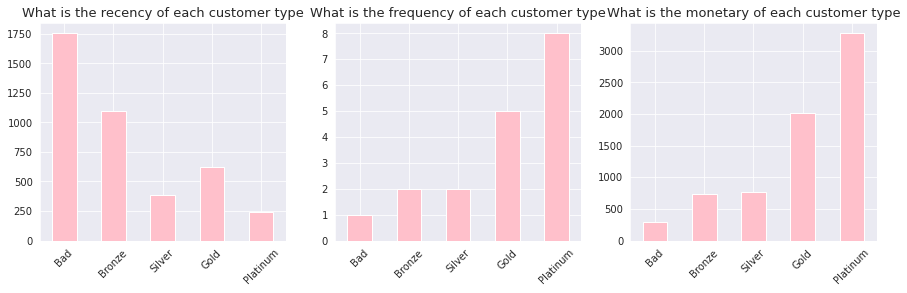

In [ ]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='pink')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

## K-MEANS CLUSTERING

In [ ]:
# copying the data into new variable
df_kmeans = rfm.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,448,5,1233.45
1,WAUZZZ8P07A02124,204,2,757.33
2,WAUZZZ8P1CA04845,2094,1,208.16
3,WAUZZZ8T4EA06800,655,6,4483.83
4,WAUZZZ8TX8A00452,1507,1,156.80


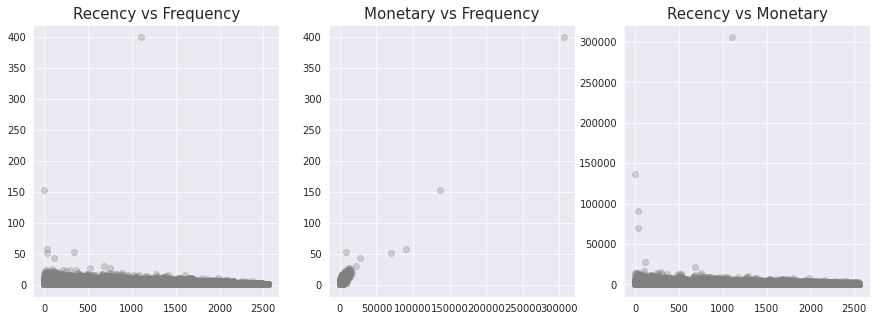

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1) # UNA FILA, TRES GRAFICOS POR FILA, Y LO HACEMOS EN LA PRIMERA. 
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='grey', alpha=0.3) # en este primero metemos el kmeans de recency y frecuenciy 
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='grey', alpha=0.3) # en este segundo metemos monetary y frecuency
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='grey', alpha=0.3) # en el tercero recency vs monetary
plt.title('Recency vs Monetary', size=15)
plt.show()

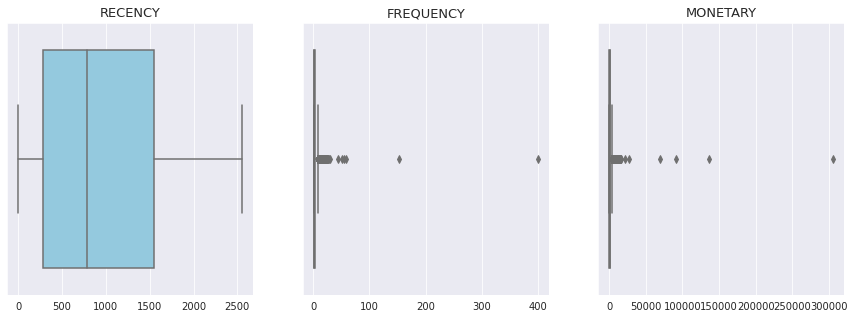

In [ ]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [ ]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [ ]:
# resetting the index
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54427 entries, 0 to 54426
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   54427 non-null  object 
 1   recency    54427 non-null  int64  
 2   frequency  54427 non-null  int64  
 3   monetary   54427 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
# looking at random 5 rows
df_kmeans.sample(5)

,Bastidor,recency,frequency,monetary
3208,WAUZZZ4G3GN131975,1649,1,26.14
42692,WVWZZZ3CZBP313184,191,6,2530.65
11754,WAUZZZ8P4CA126747,1687,1,65.05
35060,WVGZZZ5NZJW878618,168,2,236.94
22732,WAUZZZ8X7HB042262,589,3,1021.66


In [ ]:
# removing customer id as it will not used in making cluster
df_kmeans = df_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,-0.685824,0.830041,0.115515
1,-1.016458,-0.366744,-0.264689
2,1.544599,-0.765672,-0.703227
3,-0.405327,1.228969,2.711098
4,0.749181,-0.765672,-0.744241


- inicialmente sin ningún conocimiento estamos clusterizando los datos en 5 clusters. La unica intuición que tenemos es RFM, con lo cual categorizamos en 5.
- mas tarde veremos más metodos para optimizar el valor de K

In [ ]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [ ]:
# checking the labels
model_clus5.labels_

array([2, 0, 3, ..., 0, 0, 1], dtype=int32)

In [ ]:
df_kmeans['clusters'] = model_clus5.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,448,5,1233.45,2
1,204,2,757.33,0
2,2094,1,208.16,3
3,655,6,4483.83,4
4,1507,1,156.80,1


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,307.0,2.0,547.0
1,1164.0,2.0,503.0
2,575.0,5.0,2104.0
3,2045.0,2.0,536.0
4,380.0,9.0,4598.0


- METODO DEL CODO

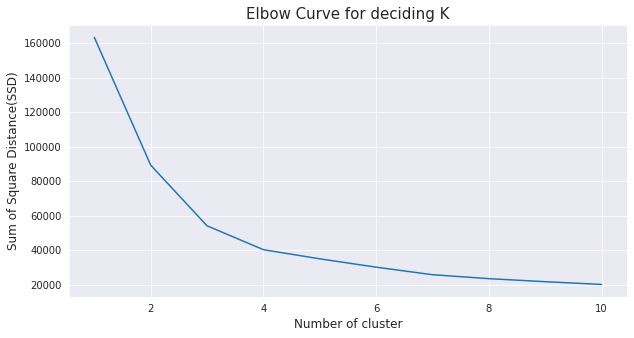

In [ ]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [ ]:
# Silhouette analysis

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4837292209430216
For n_clusters=3, the silhouette score is 0.4347994725804467
For n_clusters=4, the silhouette score is 0.431145813724114
For n_clusters=5, the silhouette score is 0.35591410224623304
For n_clusters=6, the silhouette score is 0.34527685659286794
For n_clusters=7, the silhouette score is 0.36645753015059246
For n_clusters=8, the silhouette score is 0.3536136359078236
For n_clusters=9, the silhouette score is 0.32492937773585984
For n_clusters=10, the silhouette score is 0.3263425331483647


In [ ]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [ ]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,448,5,1233.45,0
1,204,2,757.33,0
2,2094,1,208.16,1
3,655,6,4483.83,2
4,1507,1,156.80,1


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,465.0,2.0,706.0
1,1789.0,2.0,557.0
2,489.0,7.0,3253.0


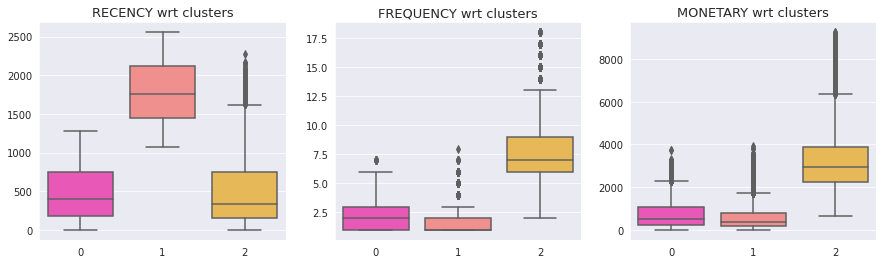

In [ ]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

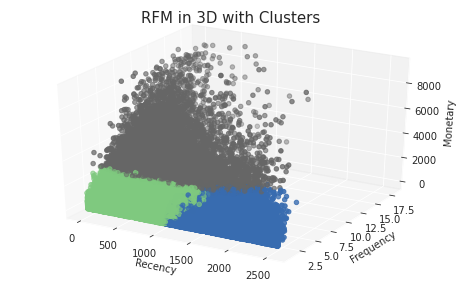

In [ ]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()